In [1]:

import numpy as np
import pandas as pd
import itertools
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from datetime import datetime

from sklearn import linear_model
from sklearn import metrics

from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [9]:

df_test = pd.read_csv('/content/test.csv')
df_test.head()


,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,STANDING
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,STANDING
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2,STANDING
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,2,STANDING
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,2,STANDING


In [10]:
df_train=pd.read_csv('/content/train.csv')
df_train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [11]:
df_train.shape

(7352, 563)

In [12]:
df_test.shape

(2947, 563)

CHECKING FOR THE **BALANCE** OF THE DATASET

In [13]:
df_train['Activity'].value_counts()

LAYING                1407
STANDING              1374
SITTING               1286
WALKING               1226
WALKING_UPSTAIRS      1073
WALKING_DOWNSTAIRS     986
Name: Activity, dtype: int64

In [14]:
df_train.columns

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'fBodyBodyGyroJerkMag-kurtosis()', 'angle(tBodyAccMean,gravity)',
       'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'subject', 'Activity'],
      dtype='object', length=563)

In [15]:
df_train.describe()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
count,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,...,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000
mean,0.274488,-0.017695,-0.109141,-0.605438,-0.510938,-0.604754,-0.630512,-0.526907,-0.606150,-0.468604,...,-0.307009,-0.625294,0.008684,0.002186,0.008726,-0.005981,-0.489547,0.058593,-0.056515,17.413085
std,0.070261,0.040811,0.056635,0.448734,0.502645,0.418687,0.424073,0.485942,0.414122,0.544547,...,0.321011,0.307584,0.336787,0.448306,0.608303,0.477975,0.511807,0.297480,0.279122,8.975143
min,-1.000000,-1.000000,-1.000000,-1.000000,-0.999873,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-0.995357,-0.999765,-0.976580,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000
25%,0.262975,-0.024863,-0.120993,-0.992754,-0.978129,-0.980233,-0.993591,-0.978162,-0.980251,-0.936219,...,-0.542602,-0.845573,-0.121527,-0.289549,-0.482273,-0.376341,-0.812065,-0.017885,-0.143414,8.000000
50%,0.277193,-0.017219,-0.108676,-0.946196,-0.851897,-0.859365,-0.950709,-0.857328,-0.857143,-0.881637,...,-0.343685,-0.711692,0.009509,0.008943,0.008735,-0.000368,-0.709417,0.182071,0.003181,19.000000
75%,0.288461,-0.010783,-0.097794,-0.242813,-0.034231,-0.262415,-0.292680,-0.066701,-0.265671,-0.017129,...,-0.126979,-0.503878,0.150865,0.292861,0.506187,0.359368,-0.509079,0.248353,0.107659,26.000000
max,1.000000,1.000000,1.000000,1.000000,0.916238,1.000000,1.000000,0.967664,1.000000,1.000000,...,0.989538,0.956845,1.000000,1.000000,0.998702,0.996078,1.000000,0.478157,1.000000,30.000000


CHECKING FOR THE **DUPLICATES**

In [16]:
print("Total Duplicates Train: {} \n".format(sum(df_train.duplicated())))
print("Total Duplicates in Test: {} \n".format(sum(df_test.duplicated())))

Total Duplicates Train: 0 

Total Duplicates in Test: 0 



In [17]:
print("Total Null values in Train: {}\n".format(df_train.isnull().values.sum()))
print("Total Null values in Test: {} \n".format(df_test.isnull().values.sum()))

Total Null values in Train: 0

Total Null values in Test: 0 



In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

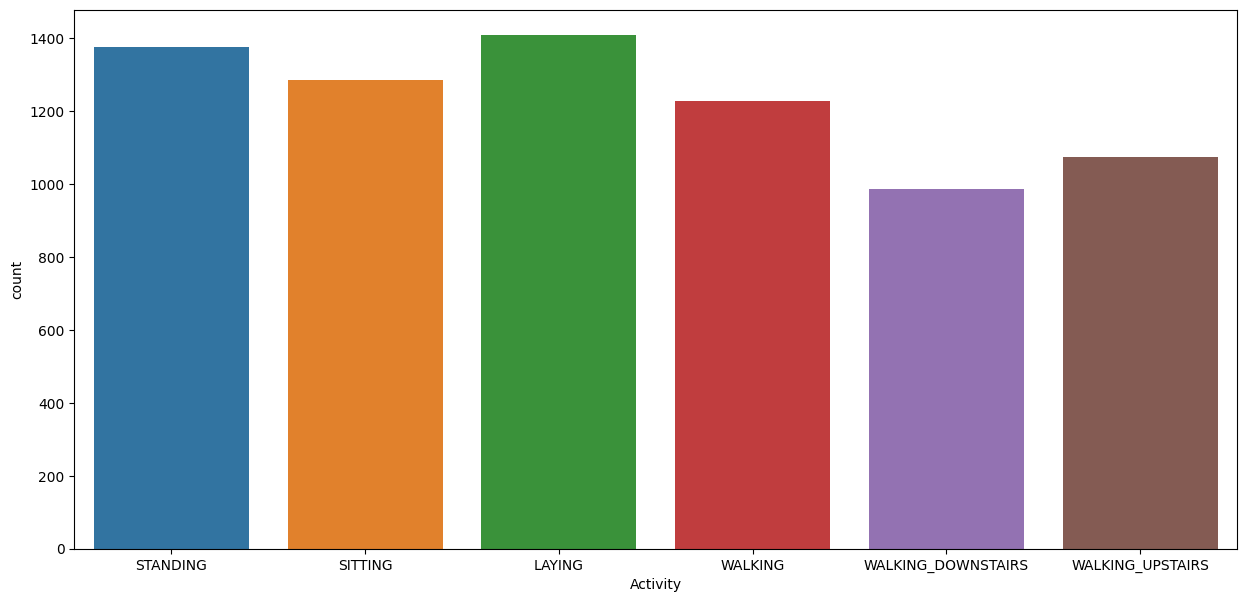

In [22]:
plt.figure(figsize = (15,7))
sns.countplot(x = 'Activity', data = df_train);

In [ ]:
df_train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


TO REMOVE **'bracket'** between the feature's name

In [23]:
columns = df_train.columns
columns = columns.str.replace('[()]','')
columns = columns.str.replace('[-]','')
columns = columns.str.replace('[,]','')

In [24]:
df_train.columns = columns
df_test.columns = columns

In [25]:
df_train.columns

Index(['tBodyAccmeanX', 'tBodyAccmeanY', 'tBodyAccmeanZ', 'tBodyAccstdX',
       'tBodyAccstdY', 'tBodyAccstdZ', 'tBodyAccmadX', 'tBodyAccmadY',
       'tBodyAccmadZ', 'tBodyAccmaxX',
       ...
       'fBodyBodyGyroJerkMagkurtosis', 'angletBodyAccMeangravity',
       'angletBodyAccJerkMeangravityMean', 'angletBodyGyroMeangravityMean',
       'angletBodyGyroJerkMeangravityMean', 'angleXgravityMean',
       'angleYgravityMean', 'angleZgravityMean', 'subject', 'Activity'],
      dtype='object', length=563)

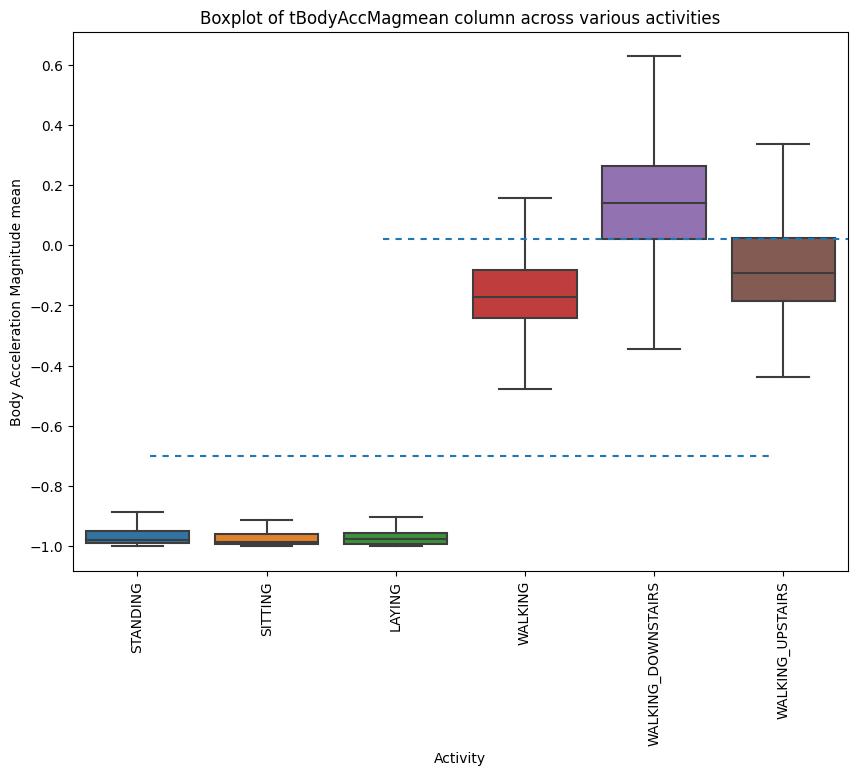

In [26]:
plt.figure(figsize = (10,7))
sns.boxplot(x = 'Activity', y ='tBodyAccMagmean', data = df_train, showfliers = False);
plt.ylabel('Body Acceleration Magnitude mean')
plt.title('Boxplot of tBodyAccMagmean column across various activities')
plt.axhline(y =- 0.7, xmin = 0.1, xmax = 0.9, dashes = (3,3))
plt.axhline(y = 0.020, xmin = 0.4, dashes = (3,3))
plt.xticks(rotation = 90)
plt.show()

**FROM THIS WE CAN INFER THAT:**
==>if(tBodyAccMagmean <= -0.8):
      Activity = "static"
  if(tBodyAccMagmean >= -0.6):
      Activity = "dynamic"

==>if (tBodyAccMagmean > 0.02):
    Activity = "WALKING_DOWNSTARIS"

In [43]:
y_train = df_train.Activity
X_train = df_train.drop(['subject','Activity'], axis = 1)
y_test = df_test.Activity
X_test = df_test.drop(['subject','Activity'], axis = 1)
print('Training data size:', X_train.shape)
print('Test data size:', X_test.shape)

Training data size: (7352, 561)
Test data size: (2947, 561)


In [36]:
from sklearn.manifold import TSNE
X_for_tsne = df_train.drop(['subject','Activity'], axis = 1)
tsne = TSNE(random_state = 42, n_components = 2, verbose = 1, perplexity = 50, n_iter = 1000).fit_transform(X_for_tsne)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.041s...
[t-SNE] Computed neighbors for 7352 samples in 5.528s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.437672
[t-SNE] KL divergence after 250 iterations with early exaggeration: 74.090683
[t-SNE] KL divergence after 1000 iterations: 1.295689


<Axes: >

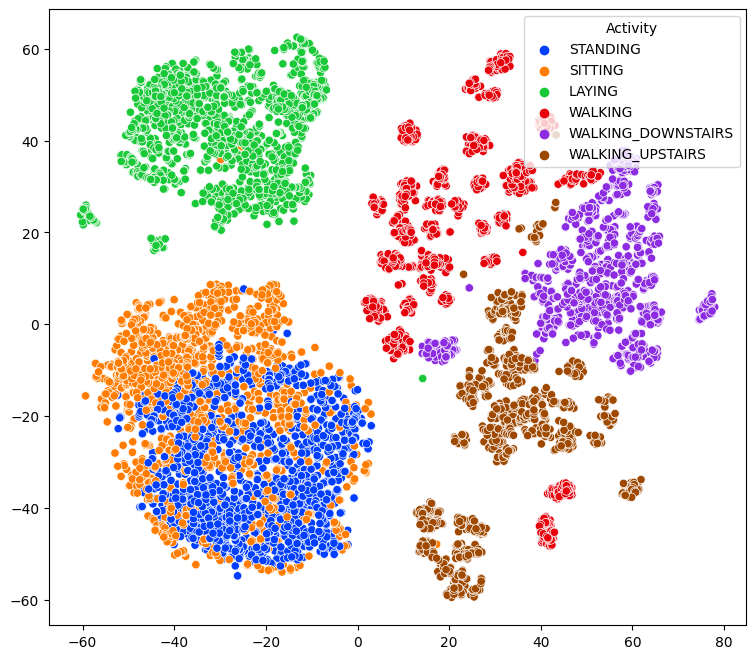

In [38]:
plt.figure(figsize = (9,8))
sns.scatterplot(x = tsne[:,0], y = tsne[:,1], hue = df_train["Activity"], palette = "bright")

In [39]:
model_score = pd.DataFrame(columns = ("Model","Score"))

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import numpy as np

import warnings
warnings.filterwarnings("ignore")

In [44]:
parameters = {'C':np.arange(10,61,10),'penalty':['l2','l1']}
lr_classifier = LogisticRegression()
lr_classifier_rs = RandomizedSearchCV(lr_classifier, param_distributions = parameters, cv = 5, random_state = 42)
lr_classifier_rs.fit(X_train, y_train)
y_pred = lr_classifier_rs.predict(X_test)

In [45]:
lr_accuracy = accuracy_score(y_true = y_test, y_pred = y_pred)
print("Accuracy using Logisitc Regression:", lr_accuracy)

Accuracy using Logisitc Regression: 0.9548693586698337


In [47]:
lr_classifier_rs.best_estimator_

LogisticRegression(C=60)

In [48]:
def plot_confusion_matrix(cm, lables):
    fig, ax = plt.subplots(figsize = (12,8))
    im = ax.imshow(cm, interpolation = 'nearest', cmap = plt.cm.Blues)
    ax.figure.colorbar(im, ax = ax)
    ax.set(xticks = np.arange(cm.shape[1]))
    yticks = np.arange(cm.shape[0])
    ylabel = 'True label'
    xlabel = 'Predicted label'
    plt.xticks(rotation = 90)
    thresh = cm.max() / 2
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, int(cm[i,j]), ha = "center", va = "center", color = "white" if cm[i,j]> thresh else "black")
            fig.tight_layout()


In [69]:
model_score = model_score.append(pd.DataFrame({'Model':["LogisticRegression"],'Score':[lr_accuracy]}))

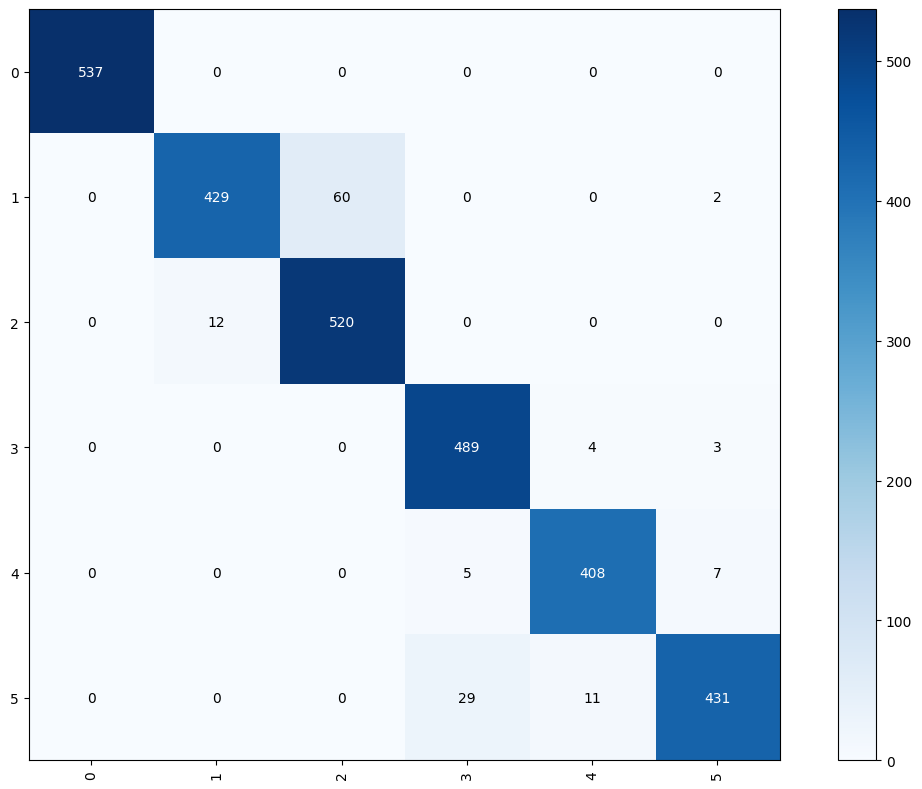

In [49]:
cm = confusion_matrix(y_test.values, y_pred)
plot_confusion_matrix(cm, np.unique(y_pred))

In [50]:
def get_best_randomsearch_results(model):
    print("Best estimator:", model.best_estimator_)
    print("Best set of parameters:", model.best_params_)
    print("Best score:", model.best_score_)

In [51]:
get_best_randomsearch_results(lr_classifier_rs)

Best estimator: LogisticRegression(C=60)
Best set of parameters: {'penalty': 'l2', 'C': 60}
Best score: 0.9325417944200115


In [52]:
from sklearn.tree import DecisionTreeClassifier

In [53]:
parameters = {'max_depth':np.arange(2,10,2)}
dt_classifier = DecisionTreeClassifier()
dt_classifier_rs = RandomizedSearchCV(dt_classifier,param_distributions=parameters,random_state = 42)
dt_classifier_rs.fit(X_train, y_train)
y_pred = dt_classifier_rs.predict(X_test)

In [54]:
dt_accuracy = accuracy_score(y_true = y_test, y_pred = y_pred)
print("Accuracy using Decision tree:", dt_accuracy)

Accuracy using Decision tree: 0.8724126230064473


In [70]:
model_score = model_score.append(pd.DataFrame({'Model':["DecisionTrees"],'Score':[dt_accuracy]}))




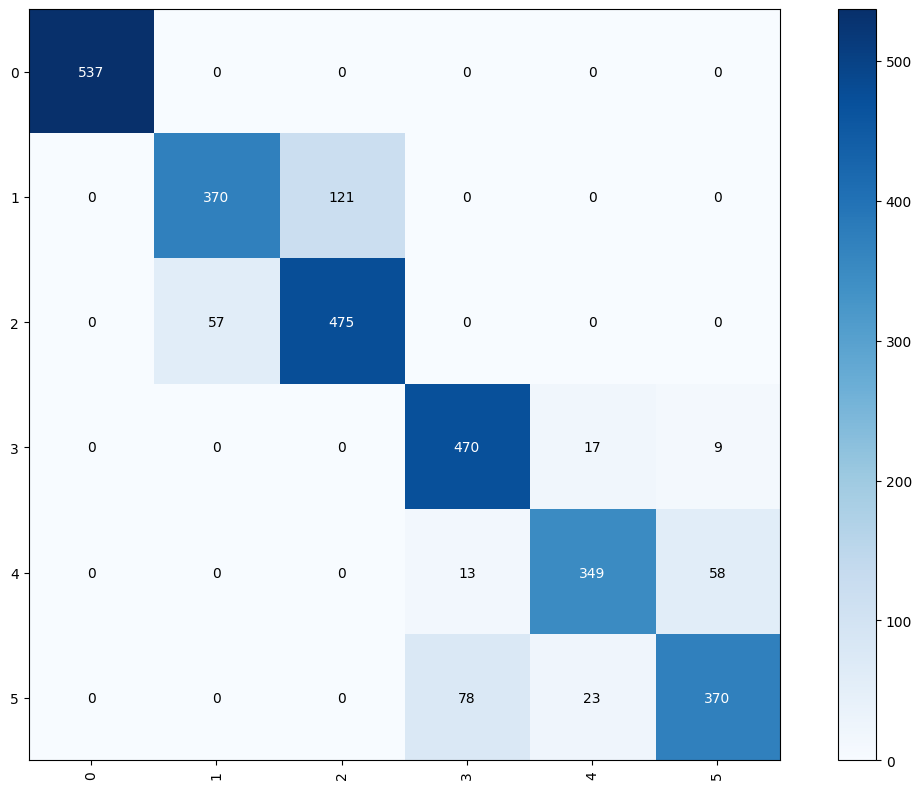

In [56]:
cm = confusion_matrix(y_test.values, y_pred)
plot_confusion_matrix(cm, np.unique(y_pred))

RANDOM FOREST

In [57]:
from sklearn.ensemble import RandomForestClassifier

In [58]:
params = {'n_estimators': np.arange(20,101,10), 'max_depth':np.arange(2,16,2)}
rf_classifier = RandomForestClassifier()
rf_classifier_rs = RandomizedSearchCV(rf_classifier, param_distributions=params,random_state = 42)
rf_classifier_rs.fit(X_train, y_train)
y_pred = rf_classifier_rs.predict(X_test)

In [59]:
rf_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy using Random Forest:", rf_accuracy)

Accuracy using Random Forest: 0.9219545300305395


In [72]:
model_score = model_score.append(pd.DataFrame({'Model':["RandomForest"],'Score':[rf_accuracy]}))

**SVM**

In [63]:
from sklearn.svm import LinearSVC

In [64]:
parameters = {'C': np.arange(1,12,2)}
lr_svm = LinearSVC(tol = 0.00005)
lr_svm_rs = RandomizedSearchCV(lr_svm, param_distributions = parameters, random_state = 42)
lr_svm_rs.fit(X_train, y_train)
y_pred = lr_svm_rs.predict(X_test)

In [65]:
lr_svm_accuracy = accuracy_score(y_true = y_test, y_pred = y_pred)
print("Accuracy using Linear SVM:", lr_svm_accuracy)

Accuracy using Linear SVM: 0.9684424838819138


In [73]:
model_score = model_score.append(pd.DataFrame({'Model':["LinearSVM"],'Score':[lr_svm_accuracy]}))

**KNN**

In [78]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
  
knn.fit(X_train, y_train)

knn_acc=knn.score(X_test, y_test)
# Calculate the accuracy of the model
print(knn_acc)


0.9022734984730234


In [79]:
model_score = model_score.append(pd.DataFrame({'Model':["knn"],'Score':[knn_acc]}))

In [82]:
model_score

,Model,Score
0,LogisticRegression,0.954869
0,DecisionTrees,0.872413
0,LogisticRegression,0.954869
0,DecisionTrees,0.872413
0,RandomForest,0.921955
0,RandomForest,0.921955
0,LinearSVM,0.968442
0,knn,<bound method ClassifierMixin.score of KNeighb...
0,knn,0.902273


In [85]:
s=pd.read_csv("/content/score.csv")
s

,Model1,Score
0,LogisticRegression,0.954869
1,DecisionTrees,0.872413
2,RandomForest,0.921955
3,Linear SVM,0.968442
4,knn,0.902273
